# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import w_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities


['sao filipe',
 'burgersdorp',
 'atuona',
 'mataura',
 'necochea',
 'busselton',
 'astrea',
 'bluff',
 'ushuaia',
 'vaini',
 'constitucion',
 'hasaki',
 'viedma',
 'santa rita',
 'ponta do sol',
 'saryozek',
 'shizunai',
 'puerto ayora',
 'sitka',
 'punta arenas',
 'rocha',
 'kodiak',
 'camocim',
 'genhe',
 'lorengau',
 'hermanus',
 'gladstone',
 'taolanaro',
 'victoria',
 'mahebourg',
 'puro',
 'chagda',
 'moldava nad bodvou',
 'kaohsiung',
 'la union',
 'georgetown',
 'sembakung',
 'new norfolk',
 'port alfred',
 'albany',
 'hamilton',
 'saskylakh',
 'fortuna',
 'ust-ordynskiy',
 'saint-pierre',
 'robertsport',
 'aklavik',
 'priekule',
 'rikitea',
 'pietarsaari',
 'mandurah',
 'khatanga',
 'boende',
 'svetlogorsk',
 'severo-kurilsk',
 'tsihombe',
 'castro',
 'los llanos de aridane',
 'jaslo',
 'ola',
 'barentsburg',
 'pevek',
 'paamiut',
 'shahrud',
 'kjollefjord',
 'wagar',
 'pangnirtung',
 'anloga',
 'poniatowa',
 'rovaniemi',
 'jamestown',
 'illoqqortoormiut',
 'nikolskoye',
 'eas

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?q=bluff&appid="+w_api_key

#api_key = "&apikey=" + weather_api_key
#response = requests.get(url)
#print (response)
#data = response.json()

#weather_df = pd.DataFrame()
#weather = {}

lat = []
lng = []
temp = []
wthr = []
temp_min = []
temp_max = []
pressure = []
humidity = []
visibility = []
clouds = []
wind = []
country = []
id = []
c_city = []


# loop through cities
for x in cities:
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={x}&units=imperial&appid={w_api_key}"

    # fetch weather for city
    weather_df = requests.get(query_url).json()
    
    try:

        lat.append(weather_df["coord"]["lat"])
    
        lng.append(weather_df["coord"]["lon"])
    
        wthr.append(weather_df["weather"][0]["main"])

        temp.append(weather_df["main"]["temp"])
    
        temp_min.append(weather_df["main"]["temp_min"])

        temp_max.append(weather_df["main"]["temp_max"])

        pressure.append(weather_df["main"]["pressure"])
 
        humidity.append(weather_df["main"]["humidity"])

        visibility.append(weather_df["visibility"])

        clouds.append(weather_df["clouds"]["all"])

        wind.append(weather_df["wind"]["speed"])

        country.append(weather_df["name"])

        id.append(weather_df["id"])

        c_city.append(x)
        
        

    # weather_df=weather_df.append(weather,ignore_index = True)
        print(f"{cities.index(x)+1} weather for {x}")
        print(weather_df)
    except KeyError:
        print(f"{cities.index(x)+1} city not found: {x}")
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1) 

df_final = pd.DataFrame({"id":id,"city":c_city,"country":country,"latitude":lat,"longitude":lng,
                         "curr_weather":wthr,"temperature":temp,"min_temperature":temp_min,"max_temperature":temp_max,
                         "pressure":pressure,"humidity%":humidity,"visibility":visibility,"cloudiness":clouds,
                         "wind_speed":wind})

df_final

1 weather for sao filipe
{'coord': {'lon': -24.4956, 'lat': 14.8961}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.97, 'feels_like': 71.24, 'temp_min': 70.97, 'temp_max': 70.97, 'pressure': 1015, 'humidity': 74, 'sea_level': 1015, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 14, 'deg': 63, 'gust': 13.76}, 'clouds': {'all': 6}, 'dt': 1645737758, 'sys': {'country': 'CV', 'sunrise': 1645689483, 'sunset': 1645731883}, 'timezone': -3600, 'id': 3374210, 'name': 'São Filipe', 'cod': 200}
2 weather for burgersdorp
{'coord': {'lon': 26.3286, 'lat': -30.9977}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.1, 'feels_like': 66.42, 'temp_min': 67.1, 'temp_max': 67.1, 'pressure': 1014, 'humidity': 62, 'sea_level': 1014, 'grnd_level': 863}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 151, 'gust': 9.01}, 'clouds': {'

15 weather for ponta do sol
{'coord': {'lon': -17.1, 'lat': 32.6667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 61.74, 'feels_like': 61, 'temp_min': 60.71, 'temp_max': 64.06, 'pressure': 1021, 'humidity': 72, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 11.68, 'deg': 29, 'gust': 13.82}, 'rain': {'1h': 0.12}, 'clouds': {'all': 31}, 'dt': 1645737779, 'sys': {'type': 2, 'id': 2008291, 'country': 'PT', 'sunrise': 1645688539, 'sunset': 1645729278}, 'timezone': 0, 'id': 2264557, 'name': 'Ponta do Sol', 'cod': 200}
16 weather for saryozek
{'coord': {'lon': 77.9753, 'lat': 44.3583}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 22.55, 'feels_like': 16.74, 'temp_min': 22.55, 'temp_max': 22.55, 'pressure': 1030, 'humidity': 76, 'sea_level': 1030, 'grnd_level': 916}, 'visibility': 10000, 'wind': {'speed': 

30 weather for mahebourg
{'coord': {'lon': 57.7, 'lat': -20.4081}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.29, 'feels_like': 78.62, 'temp_min': 76.24, 'temp_max': 77.29, 'pressure': 1013, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 210}, 'clouds': {'all': 40}, 'dt': 1645737803, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1645754707, 'sunset': 1645799991}, 'timezone': 14400, 'id': 934322, 'name': 'Mahébourg', 'cod': 200}
31 weather for puro
{'coord': {'lon': 123.3827, 'lat': 12.4841}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.41, 'feels_like': 78.66, 'temp_min': 77.41, 'temp_max': 77.41, 'pressure': 1013, 'humidity': 81, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 14.94, 'deg': 45, 'gust': 24.58}, 'clouds': {'all': 92}, 'dt': 16457

45 weather for saint-pierre
{'coord': {'lon': 55.4781, 'lat': -21.3393}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.51, 'feels_like': 78.01, 'temp_min': 75.18, 'temp_max': 76.68, 'pressure': 1012, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1645737827, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1645755198, 'sunset': 1645800567}, 'timezone': 14400, 'id': 935214, 'name': 'Saint-Pierre', 'cod': 200}
46 weather for robertsport
{'coord': {'lon': -11.3686, 'lat': 6.7533}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.09, 'feels_like': 87.24, 'temp_min': 81.09, 'temp_max': 81.09, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 8.97, 'deg': 215, 'gust': 13.78}, 'clouds': {'all': 100}, 'dt':

60 weather for ola
{'coord': {'lon': 151.2833, 'lat': 59.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -2.81, 'feels_like': -15.41, 'temp_min': -2.81, 'temp_max': -2.81, 'pressure': 986, 'humidity': 85, 'sea_level': 986, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 7.14, 'deg': 14, 'gust': 9.82}, 'clouds': {'all': 95}, 'dt': 1645737849, 'sys': {'country': 'RU', 'sunrise': 1645736750, 'sunset': 1645773034}, 'timezone': 39600, 'id': 2122574, 'name': 'Ola', 'cod': 200}
61 city not found: barentsburg
62 weather for pevek
{'coord': {'lon': 170.3133, 'lat': 69.7008}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -14.71, 'feels_like': -14.71, 'temp_min': -14.71, 'temp_max': -14.71, 'pressure': 1004, 'humidity': 94, 'sea_level': 1004, 'grnd_level': 997}, 'visibility': 7369, 'wind': {'speed': 1.5, 'deg': 357,

76 weather for mudgee
{'coord': {'lon': 149.5871, 'lat': -32.5943}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.84, 'feels_like': 70.66, 'temp_min': 67.62, 'temp_max': 69.85, 'pressure': 1014, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 150}, 'clouds': {'all': 100}, 'dt': 1645737873, 'sys': {'type': 1, 'id': 9547, 'country': 'AU', 'sunrise': 1645732021, 'sunset': 1645778576}, 'timezone': 39600, 'id': 2156404, 'name': 'Mudgee', 'cod': 200}
77 weather for oskarshamn
{'coord': {'lon': 16.4484, 'lat': 57.2645}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 40.98, 'feels_like': 33.42, 'temp_min': 38.97, 'temp_max': 40.98, 'pressure': 994, 'humidity': 86, 'sea_level': 994, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 13.94, 'deg': 189, 'gust': 28.16}, 'clouds': {'all': 100}, 'dt': 16

91 city not found: santa cruz de rosales
92 weather for mango
{'coord': {'lon': -82.3065, 'lat': 27.9797}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 83.41, 'feels_like': 85.41, 'temp_min': 72.86, 'temp_max': 89.06, 'pressure': 1021, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1645737896, 'sys': {'type': 2, 'id': 2017073, 'country': 'US', 'sunrise': 1645703937, 'sunset': 1645745176}, 'timezone': -18000, 'id': 4163318, 'name': 'Mango', 'cod': 200}
93 weather for waiouru
{'coord': {'lon': 175.6667, 'lat': -39.4833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 56.86, 'feels_like': 54.82, 'temp_min': 56.86, 'temp_max': 56.86, 'pressure': 1021, 'humidity': 55, 'sea_level': 1021, 'grnd_level': 927}, 'visibility': 10000, 'wind': {'speed': 3.76, 'deg': 101, 'gust': 6.98

110 weather for kozhva
{'coord': {'lon': 57.0459, 'lat': 65.1073}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.11, 'feels_like': -5.15, 'temp_min': 7.11, 'temp_max': 7.11, 'pressure': 1012, 'humidity': 97, 'sea_level': 1012, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 7.65, 'deg': 184, 'gust': 19.48}, 'clouds': {'all': 89}, 'dt': 1645737926, 'sys': {'country': 'RU', 'sunrise': 1645760282, 'sunset': 1645794730}, 'timezone': 10800, 'id': 543246, 'name': 'Kozhva', 'cod': 200}
111 weather for werda
{'coord': {'lon': 23.2833, 'lat': -25.2667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 83.28, 'feels_like': 81.1, 'temp_min': 83.28, 'temp_max': 83.28, 'pressure': 1010, 'humidity': 26, 'sea_level': 1010, 'grnd_level': 900}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 104, 'gust': 6.38}, 'clouds': {'a

126 weather for sur
{'coord': {'lon': 59.5289, 'lat': 22.5667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 71.85, 'feels_like': 71.65, 'temp_min': 71.85, 'temp_max': 71.85, 'pressure': 1016, 'humidity': 62, 'sea_level': 1016, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 182, 'gust': 8.68}, 'clouds': {'all': 48}, 'dt': 1645737949, 'sys': {'country': 'OM', 'sunrise': 1645756015, 'sunset': 1645797806}, 'timezone': 14400, 'id': 286245, 'name': 'Sur', 'cod': 200}
127 weather for portland
{'coord': {'lon': -122.6762, 'lat': 45.5234}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 38.12, 'feels_like': 32.86, 'temp_min': 35.2, 'temp_max': 42.21, 'pressure': 1031, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 58, 'gust': 13}, 'clouds': {'all': 75}, 'dt': 1645737897, 'sys': {'type': 

142 weather for canutama
{'coord': {'lon': -64.3831, 'lat': -6.5339}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.89, 'feels_like': 87.53, 'temp_min': 80.89, 'temp_max': 80.89, 'pressure': 1006, 'humidity': 87, 'sea_level': 1006, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 120, 'gust': 8.97}, 'rain': {'1h': 0.37}, 'clouds': {'all': 80}, 'dt': 1645737971, 'sys': {'country': 'BR', 'sunrise': 1645698191, 'sunset': 1645742320}, 'timezone': -14400, 'id': 3664716, 'name': 'Canutama', 'cod': 200}
143 weather for petropavlovsk-kamchatskiy
{'coord': {'lon': 158.6483, 'lat': 53.0452}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 5.59, 'feels_like': -7.01, 'temp_min': 4.78, 'temp_max': 5.59, 'pressure': 976, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1

157 weather for caravelas
{'coord': {'lon': -39.2481, 'lat': -17.7125}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 79.92, 'feels_like': 79.92, 'temp_min': 79.92, 'temp_max': 79.92, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.4, 'deg': 82, 'gust': 13.73}, 'clouds': {'all': 3}, 'dt': 1645737992, 'sys': {'country': 'BR', 'sunrise': 1645691681, 'sunset': 1645736766}, 'timezone': -10800, 'id': 3466980, 'name': 'Caravelas', 'cod': 200}
158 weather for kruisfontein
{'coord': {'lon': 24.7314, 'lat': -34.0033}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.89, 'feels_like': 75.54, 'temp_min': 73.89, 'temp_max': 73.89, 'pressure': 1015, 'humidity': 97, 'sea_level': 1015, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 7.07, 'deg': 104, 'gust': 16.78}, '

173 weather for bredasdorp
{'coord': {'lon': 20.0403, 'lat': -34.5322}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.12, 'feels_like': 69.62, 'temp_min': 69.12, 'temp_max': 70.29, 'pressure': 1017, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 210}, 'clouds': {'all': 100}, 'dt': 1645738016, 'sys': {'type': 1, 'id': 1966, 'country': 'ZA', 'sunrise': 1645676562, 'sunset': 1645723430}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
174 city not found: grand centre
175 weather for lavrentiya
{'coord': {'lon': -171, 'lat': 65.5833}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 28.02, 'feels_like': 17.28, 'temp_min': 28.02, 'temp_max': 28.02, 'pressure': 996, 'humidity': 97, 'sea_level': 996, 'grnd_level': 995}, 'visibility': 140, 'wind': {'speed': 13.11, 'deg': 31, 'gust': 20.02}, 'sno

188 weather for marolambo
{'coord': {'lon': 48.1167, 'lat': -20.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 72.28, 'feels_like': 73.81, 'temp_min': 72.28, 'temp_max': 72.28, 'pressure': 1012, 'humidity': 98, 'sea_level': 1012, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 1.39, 'deg': 242, 'gust': 1.74}, 'rain': {'1h': 0.58}, 'clouds': {'all': 100}, 'dt': 1645738038, 'sys': {'country': 'MG', 'sunrise': 1645757024, 'sunset': 1645802274}, 'timezone': 10800, 'id': 1060007, 'name': 'Marolambo', 'cod': 200}
189 city not found: belushya guba
190 weather for torbay
{'coord': {'lon': -52.7314, 'lat': 47.6666}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 22.39, 'feels_like': 9.79, 'temp_min': 21.27, 'temp_max': 23.58, 'pressure': 1006, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 35.68, 'deg': 300, 'gus

203 weather for yongan
{'coord': {'lon': 113.6871, 'lat': 39.6957}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.24, 'feels_like': 19.24, 'temp_min': 19.24, 'temp_max': 19.24, 'pressure': 1027, 'humidity': 75, 'sea_level': 1027, 'grnd_level': 894}, 'visibility': 10000, 'wind': {'speed': 2.98, 'deg': 156, 'gust': 4.16}, 'clouds': {'all': 1}, 'dt': 1645738058, 'sys': {'country': 'CN', 'sunrise': 1645743909, 'sunset': 1645783919}, 'timezone': 28800, 'id': 1806687, 'name': 'Yong’an', 'cod': 200}
204 weather for yenagoa
{'coord': {'lon': 6.2642, 'lat': 4.9247}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 81.64, 'feels_like': 87.71, 'temp_min': 81.64, 'temp_max': 81.64, 'pressure': 1010, 'humidity': 79, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.59, 'deg': 232, 'gust': 11.45}, 'clouds': {'all': 9}

218 weather for baruun-urt
{'coord': {'lon': 113.2792, 'lat': 46.6806}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.81, 'feels_like': -0.22, 'temp_min': 7.81, 'temp_max': 7.81, 'pressure': 1024, 'humidity': 86, 'sea_level': 1024, 'grnd_level': 901}, 'visibility': 10000, 'wind': {'speed': 4.23, 'deg': 310, 'gust': 7.23}, 'clouds': {'all': 98}, 'dt': 1645738079, 'sys': {'country': 'MN', 'sunrise': 1645744494, 'sunset': 1645783530}, 'timezone': 28800, 'id': 2032614, 'name': 'Baruun-Urt', 'cod': 200}
219 weather for butaritari
{'coord': {'lon': 172.7902, 'lat': 3.0707}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.82, 'feels_like': 87.66, 'temp_min': 81.82, 'temp_max': 81.82, 'pressure': 1009, 'humidity': 77, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 21.63, 'deg': 68, 'gust': 24.5

234 weather for saint anthony
{'coord': {'lon': -93.218, 'lat': 45.0205}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 10.18, 'feels_like': -2.42, 'temp_min': 7.32, 'temp_max': 13.42, 'pressure': 1029, 'humidity': 75}, 'visibility': 2414, 'wind': {'speed': 11.5, 'deg': 10}, 'snow': {'1h': 0.32}, 'clouds': {'all': 100}, 'dt': 1645737976, 'sys': {'type': 2, 'id': 2009535, 'country': 'US', 'sunrise': 1645707570, 'sunset': 1645746780}, 'timezone': -21600, 'id': 5044290, 'name': 'Saint Anthony', 'cod': 200}
235 weather for yunyang
{'coord': {'lon': 112.7142, 'lat': 33.4474}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 38.59, 'feels_like': 33.53, 'temp_min': 38.59, 'temp_max': 38.59, 'pressure': 1026, 'humidity': 71, 'sea_level': 1026, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 6.85, 'deg': 214, 'gust': 10.76}, 'clouds':

249 weather for mattawa
{'coord': {'lon': -119.9028, 'lat': 46.7379}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.67, 'feels_like': 32.67, 'temp_min': 24.71, 'temp_max': 37.02, 'pressure': 1033, 'humidity': 59, 'sea_level': 1033, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 32, 'gust': 2.53}, 'clouds': {'all': 100}, 'dt': 1645738122, 'sys': {'type': 1, 'id': 2763, 'country': 'US', 'sunrise': 1645714100, 'sunset': 1645753058}, 'timezone': -28800, 'id': 5802636, 'name': 'Mattawa', 'cod': 200}
250 weather for lagoa
{'coord': {'lon': -27.9833, 'lat': 39.05}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 57.24, 'feels_like': 55.96, 'temp_min': 57.24, 'temp_max': 57.24, 'pressure': 1033, 'humidity': 70, 'sea_level': 1033, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 10.56, 'deg'

264 weather for ko samui
{'coord': {'lon': 99.9357, 'lat': 9.5357}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.83, 'feels_like': 84.67, 'temp_min': 80.83, 'temp_max': 80.83, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 10.78, 'deg': 62, 'gust': 12.03}, 'clouds': {'all': 89}, 'dt': 1645738141, 'sys': {'country': 'TH', 'sunrise': 1645745784, 'sunset': 1645788644}, 'timezone': 25200, 'id': 1154689, 'name': 'Ko Samui', 'cod': 200}
265 weather for carutapera
{'coord': {'lon': -46.02, 'lat': -1.195}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.85, 'feels_like': 78.85, 'temp_min': 78.85, 'temp_max': 78.85, 'pressure': 1009, 'humidity': 87, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.19, 'deg': 69, 'gust': 17.87}, 'clouds

279 weather for roald
{'coord': {'lon': 6.1333, 'lat': 62.5833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.94, 'feels_like': 30.45, 'temp_min': 33.01, 'temp_max': 39.34, 'pressure': 983, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1645738161, 'sys': {'type': 1, 'id': 1602, 'country': 'NO', 'sunrise': 1645685782, 'sunset': 1645720885}, 'timezone': 3600, 'id': 3141667, 'name': 'Roald', 'cod': 200}
280 weather for khandagayty
{'coord': {'lon': 92.05, 'lat': 50.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -7.64, 'feels_like': -18.27, 'temp_min': -7.64, 'temp_max': -7.64, 'pressure': 1045, 'humidity': 97, 'sea_level': 1045, 'grnd_level': 892}, 'visibility': 5406, 'wind': {'speed': 4.29, 'deg': 344, 'gust': 3.78}, 'clouds': {'all': 82}, 'dt': 1645738162, 'sys': {

294 weather for dikson
{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.11, 'feels_like': -14.71, 'temp_min': -2.11, 'temp_max': -2.11, 'pressure': 1008, 'humidity': 94, 'sea_level': 1008, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 12.39, 'deg': 187, 'gust': 24.38}, 'clouds': {'all': 100}, 'dt': 1645738181, 'sys': {'country': 'RU', 'sunrise': 1645757384, 'sunset': 1645786349}, 'timezone': 25200, 'id': 1507390, 'name': 'Dikson', 'cod': 200}
295 weather for kandrian
{'coord': {'lon': 149.55, 'lat': -6.2167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.95, 'feels_like': 79.95, 'temp_min': 79.95, 'temp_max': 79.95, 'pressure': 1006, 'humidity': 85, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 11.7, 'deg': 355, 'gust': 21.09}, 

311 weather for sri aman
{'coord': {'lon': 111.4621, 'lat': 1.2376}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.45, 'feels_like': 74.91, 'temp_min': 73.45, 'temp_max': 73.45, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1645738204, 'sys': {'type': 1, 'id': 9370, 'country': 'MY', 'sunrise': 1645742694, 'sunset': 1645786201}, 'timezone': 28800, 'id': 1735799, 'name': 'Sri Aman', 'cod': 200}
312 weather for buala
{'coord': {'lon': 159.5921, 'lat': -8.145}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.19, 'feels_like': 89.64, 'temp_min': 83.19, 'temp_max': 83.19, 'pressure': 1008, 'humidity': 73, 'sea_level': 1008, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 316, 'gust': 9.91}, 'clouds': {'all': 98}, 'dt': 164573820

327 weather for mantua
{'coord': {'lon': 10.7833, 'lat': 45.1667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.28, 'feels_like': 42.28, 'temp_min': 39.81, 'temp_max': 48.81, 'pressure': 1018, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 219, 'gust': 3}, 'clouds': {'all': 52}, 'dt': 1645738229, 'sys': {'type': 2, 'id': 2011529, 'country': 'IT', 'sunrise': 1645682650, 'sunset': 1645721784}, 'timezone': 3600, 'id': 3174050, 'name': 'Province of Mantua', 'cod': 200}
328 weather for chiang klang
{'coord': {'lon': 100.8617, 'lat': 19.2938}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.28, 'feels_like': 62.38, 'temp_min': 62.28, 'temp_max': 62.28, 'pressure': 1018, 'humidity': 89, 'sea_level': 1018, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 1.72, 'deg': 54, 'gust': 2.04}, 'clouds': {'all

342 weather for sola
{'coord': {'lon': 167.55, 'lat': -13.8833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.27, 'feels_like': 89.02, 'temp_min': 81.27, 'temp_max': 81.27, 'pressure': 1007, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1645738249, 'sys': {'type': 1, 'id': 7307, 'country': 'VU', 'sunrise': 1645728624, 'sunset': 1645773352}, 'timezone': 39600, 'id': 2134814, 'name': 'Sola', 'cod': 200}
343 weather for yatou
{'coord': {'lon': 122.3833, 'lat': 37.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 34.79, 'feels_like': 27.52, 'temp_min': 34.79, 'temp_max': 34.79, 'pressure': 1027, 'humidity': 88, 'sea_level': 1027, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 9.33, 'deg': 229, 'gust': 18.84}, 'clouds': {'all': 0}, 'dt': 1645738250, 'sys': {'countr

357 weather for campos
{'coord': {'lon': -41.3, 'lat': -21.75}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.65, 'feels_like': 84.65, 'temp_min': 80.65, 'temp_max': 80.65, 'pressure': 1014, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 160}, 'clouds': {'all': 20}, 'dt': 1645738202, 'sys': {'type': 1, 'id': 8337, 'country': 'BR', 'sunrise': 1645691985, 'sunset': 1645737446}, 'timezone': -10800, 'id': 3467693, 'name': 'Campos dos Goytacazes', 'cod': 200}
358 weather for madang
{'coord': {'lon': 145.7966, 'lat': -5.2246}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.83, 'feels_like': 77.43, 'temp_min': 75.83, 'temp_max': 75.83, 'pressure': 1007, 'humidity': 92, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 273, 'gust': 17.96}, 'clouds': {'all': 99}, 'dt

371 weather for njombe
{'coord': {'lon': 34.7667, 'lat': -9.3333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.87, 'feels_like': 55.58, 'temp_min': 55.87, 'temp_max': 55.87, 'pressure': 1017, 'humidity': 94, 'sea_level': 1017, 'grnd_level': 814}, 'visibility': 10000, 'wind': {'speed': 4.56, 'deg': 271, 'gust': 10.04}, 'clouds': {'all': 100}, 'dt': 1645738290, 'sys': {'country': 'TZ', 'sunrise': 1645760684, 'sunset': 1645805021}, 'timezone': 10800, 'id': 151479, 'name': 'Njombe', 'cod': 200}
372 weather for the valley
{'coord': {'lon': -63.0578, 'lat': 18.217}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 79.23, 'feels_like': 79.23, 'temp_min': 76.1, 'temp_max': 80.46, 'pressure': 1014, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1645738291, 'sys': {'type':

387 weather for aswan
{'coord': {'lon': 32.907, 'lat': 24.0934}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.9, 'feels_like': 58.96, 'temp_min': 61.9, 'temp_max': 61.9, 'pressure': 1018, 'humidity': 25}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 280}, 'clouds': {'all': 0}, 'dt': 1645738312, 'sys': {'type': 1, 'id': 2526, 'country': 'EG', 'sunrise': 1645676118, 'sunset': 1645717698}, 'timezone': 7200, 'id': 359792, 'name': 'Aswān', 'cod': 200}
388 weather for alofi
{'coord': {'lon': -169.9187, 'lat': -19.0595}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.69, 'feels_like': 80.67, 'temp_min': 78.69, 'temp_max': 78.69, 'pressure': 1007, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 10}, 'clouds': {'all': 100}, 'dt': 1645738314, 'sys': {'type': 1, 'id': 7306, 'country': 'NU', 'sunrise': 16

402 weather for barreirinha
{'coord': {'lon': -57.07, 'lat': -2.7933}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 76.87, 'feels_like': 78.67, 'temp_min': 76.87, 'temp_max': 76.87, 'pressure': 1008, 'humidity': 94, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.53, 'deg': 82, 'gust': 2.64}, 'rain': {'1h': 2.73}, 'clouds': {'all': 78}, 'dt': 1645738335, 'sys': {'country': 'BR', 'sunrise': 1645696587, 'sunset': 1645740414}, 'timezone': -14400, 'id': 3406202, 'name': 'Barreirinha', 'cod': 200}
403 weather for nantucket
{'coord': {'lon': -70.0995, 'lat': 41.2835}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.68, 'feels_like': 21.67, 'temp_min': 27.97, 'temp_max': 30.96, 'pressure': 1031, 'humidity': 76, 'sea_level': 1031, 'grnd_level': 1031}, 'visibility': 10000, 'wind': {'speed': 8.57, 'd

416 city not found: sentyabrskiy
417 weather for tripoli
{'coord': {'lon': 13.1875, 'lat': 32.8752}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 55.08, 'feels_like': 53.29, 'temp_min': 55.08, 'temp_max': 55.08, 'pressure': 1024, 'humidity': 64, 'sea_level': 1024, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 4.32, 'deg': 149, 'gust': 4.36}, 'clouds': {'all': 25}, 'dt': 1645738227, 'sys': {'country': 'LY', 'sunrise': 1645681287, 'sunset': 1645721993}, 'timezone': 7200, 'id': 2210247, 'name': 'Tripoli', 'cod': 200}
418 weather for obo
{'coord': {'lon': 26.4869, 'lat': 5.3998}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.94, 'feels_like': 74.12, 'temp_min': 75.94, 'temp_max': 75.94, 'pressure': 1010, 'humidity': 19, 'sea_level': 1010, 'grnd_level': 938}, 'visibility': 10000, 'wind': {'speed': 5.08, 'de

432 weather for berasia
{'coord': {'lon': 77.4333, 'lat': 23.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.59, 'feels_like': 62.01, 'temp_min': 63.59, 'temp_max': 63.59, 'pressure': 1015, 'humidity': 50, 'sea_level': 1015, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 8.55, 'deg': 41, 'gust': 22.19}, 'clouds': {'all': 93}, 'dt': 1645738375, 'sys': {'country': 'IN', 'sunrise': 1645751767, 'sunset': 1645793460}, 'timezone': 19800, 'id': 1276449, 'name': 'Berasia', 'cod': 200}
433 weather for filadelfia
{'coord': {'lon': -75.1638, 'lat': 39.9523}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 34.45, 'feels_like': 27.16, 'temp_min': 32.36, 'temp_max': 36.55, 'pressure': 1029, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 60}, 'clouds': {'all': 100}, 'dt': 1645738254, 'sys': {'typ

449 weather for puerto penasco
{'coord': {'lon': -113.5333, 'lat': 31.3167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 58.91, 'feels_like': 56.89, 'temp_min': 58.91, 'temp_max': 58.91, 'pressure': 1020, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 10, 'deg': 270, 'gust': 18.01}, 'clouds': {'all': 0}, 'dt': 1645738397, 'sys': {'type': 2, 'id': 2004312, 'country': 'MX', 'sunrise': 1645711594, 'sunset': 1645752506}, 'timezone': -25200, 'id': 3991347, 'name': 'Puerto Peñasco', 'cod': 200}
450 weather for opuwo
{'coord': {'lon': 13.84, 'lat': -18.0607}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.94, 'feels_like': 75.81, 'temp_min': 75.94, 'temp_max': 75.94, 'pressure': 1013, 'humidity': 55, 'sea_level': 1013, 'grnd_level': 889}, 'visibility': 10000, 'wind': {'speed': 4.5, 'deg': 176, 'gust': 4.54}, 'clouds': {'all

465 weather for batemans bay
{'coord': {'lon': 150.1833, 'lat': -35.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.92, 'feels_like': 72.21, 'temp_min': 69.91, 'temp_max': 72.19, 'pressure': 1017, 'humidity': 96, 'sea_level': 1017, 'grnd_level': 1015}, 'visibility': 6628, 'wind': {'speed': 2.57, 'deg': 164, 'gust': 4.74}, 'clouds': {'all': 100}, 'dt': 1645738229, 'sys': {'type': 2, 'id': 2039610, 'country': 'AU', 'sunrise': 1645731689, 'sunset': 1645778623}, 'timezone': 39600, 'id': 2176639, 'name': 'Batemans Bay', 'cod': 200}
466 weather for talakan
{'coord': {'lon': 130.3667, 'lat': 50.3167}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 1.85, 'feels_like': 1.85, 'temp_min': 1.85, 'temp_max': 1.85, 'pressure': 1012, 'humidity': 100, 'sea_level': 1012, 'grnd_level': 990}, 'visibility': 2551, 'wind': {'speed': 2.53, 'de

480 weather for panzhihua
{'coord': {'lon': 101.7128, 'lat': 26.5851}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 44.6, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1018, 'humidity': 89, 'sea_level': 1018, 'grnd_level': 891}, 'visibility': 10000, 'wind': {'speed': 1.52, 'deg': 297, 'gust': 1.77}, 'clouds': {'all': 2}, 'dt': 1645738439, 'sys': {'country': 'CN', 'sunrise': 1645746078, 'sunset': 1645787496}, 'timezone': 28800, 'id': 6929460, 'name': 'Panzhihua', 'cod': 200}
481 weather for abha
{'coord': {'lon': 42.5053, 'lat': 18.2164}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.45, 'feels_like': 54.82, 'temp_min': 57.45, 'temp_max': 60.62, 'pressure': 1025, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1645738440, 'sys': {'type': 1, 'id': 7396, 'co

495 weather for shimanovsk
{'coord': {'lon': 127.7, 'lat': 52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.95, 'feels_like': 7.95, 'temp_min': 7.95, 'temp_max': 7.95, 'pressure': 1009, 'humidity': 98, 'sea_level': 1009, 'grnd_level': 975}, 'visibility': 7216, 'wind': {'speed': 2.8, 'deg': 279, 'gust': 2.64}, 'clouds': {'all': 100}, 'dt': 1645738461, 'sys': {'country': 'RU', 'sunrise': 1645741501, 'sunset': 1645779601}, 'timezone': 32400, 'id': 2016701, 'name': 'Shimanovsk', 'cod': 200}
496 weather for bocanda
{'coord': {'lon': -4.4995, 'lat': 7.0626}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 83.1, 'feels_like': 87.28, 'temp_min': 83.1, 'temp_max': 83.1, 'pressure': 1011, 'humidity': 65, 'sea_level': 1011, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 6.64, 'deg': 187, 'gust': 17}, 'rain': {'1h': 0.14}, 'c

510 weather for gravdal
{'coord': {'lon': 13.5031, 'lat': 68.1214}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.69, 'feels_like': 21.09, 'temp_min': 33.69, 'temp_max': 35.28, 'pressure': 972, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 42.57, 'deg': 280, 'gust': 62.14}, 'clouds': {'all': 75}, 'dt': 1645738482, 'sys': {'type': 1, 'id': 1642, 'country': 'NO', 'sunrise': 1645685280, 'sunset': 1645717849}, 'timezone': 3600, 'id': 3155152, 'name': 'Gravdal', 'cod': 200}
511 weather for coahuayana
{'coord': {'lon': -103.6833, 'lat': 18.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 89.08, 'feels_like': 93.74, 'temp_min': 89.08, 'temp_max': 89.08, 'pressure': 1011, 'humidity': 52, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 8.99, 'deg': 228, 'gust': 8.46}, 'clouds': {'all': 1}, '

525 weather for tefe
{'coord': {'lon': -64.7114, 'lat': -3.3542}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.31, 'feels_like': 92.55, 'temp_min': 84.31, 'temp_max': 84.31, 'pressure': 1006, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1645738503, 'sys': {'type': 1, 'id': 8438, 'country': 'BR', 'sunrise': 1645698398, 'sunset': 1645742270}, 'timezone': -14400, 'id': 3661944, 'name': 'Tefé', 'cod': 200}
526 weather for tokur
{'coord': {'lon': 132.9, 'lat': 53.1333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -8.57, 'feels_like': -8.57, 'temp_min': -8.57, 'temp_max': -8.57, 'pressure': 1013, 'humidity': 100, 'sea_level': 1013, 'grnd_level': 907}, 'visibility': 1351, 'wind': {'speed': 2.64, 'deg': 138, 'gust': 2.93}, 'clouds': {'all': 100}, 'dt': 1645738504, 'sys'

539 weather for north bend
{'coord': {'lon': -124.2243, 'lat': 43.4065}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 48.4, 'feels_like': 44.8, 'temp_min': 43.86, 'temp_max': 51.24, 'pressure': 1030, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1645738523, 'sys': {'type': 1, 'id': 5239, 'country': 'US', 'sunrise': 1645714885, 'sunset': 1645754346}, 'timezone': -28800, 'id': 5742974, 'name': 'North Bend', 'cod': 200}
540 weather for kenai
{'coord': {'lon': -151.2583, 'lat': 60.5544}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 38.05, 'feels_like': 28.65, 'temp_min': 36.14, 'temp_max': 41.02, 'pressure': 1011, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 90, 'gust': 27.63}, 'clouds': {'all': 100}, 'dt': 1645738525, 'sys': {'type': 1, 'id':

554 city not found: khonuu
555 weather for vavozh
{'coord': {'lon': 51.931, 'lat': 56.7751}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.83, 'feels_like': 10.83, 'temp_min': 16.83, 'temp_max': 16.83, 'pressure': 1025, 'humidity': 99, 'sea_level': 1025, 'grnd_level': 1007}, 'visibility': 8246, 'wind': {'speed': 3.8, 'deg': 268, 'gust': 3.85}, 'clouds': {'all': 92}, 'dt': 1645738543, 'sys': {'country': 'RU', 'sunrise': 1645760176, 'sunset': 1645797291}, 'timezone': 14400, 'id': 476343, 'name': 'Vavozh', 'cod': 200}
556 weather for tacuarembo
{'coord': {'lon': -55.9833, 'lat': -31.7333}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 69.42, 'feels_like': 70.25, 'temp_min': 69.42, 'temp_max': 69.42, 'pressure': 1010, 'humidity': 89, 'sea_level': 1010, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 11.74, 'deg': 1

569 weather for calama
{'coord': {'lon': -68.9333, 'lat': -22.4667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.69, 'feels_like': 74.03, 'temp_min': 75.69, 'temp_max': 75.69, 'pressure': 1022, 'humidity': 23}, 'visibility': 10000, 'wind': {'speed': 24.16, 'deg': 280}, 'clouds': {'all': 0}, 'dt': 1645738544, 'sys': {'type': 1, 'id': 8480, 'country': 'CL', 'sunrise': 1645698585, 'sunset': 1645744109}, 'timezone': -10800, 'id': 3897347, 'name': 'Calama', 'cod': 200}
570 weather for ixtapa
{'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 76.23, 'feels_like': 76.78, 'temp_min': 76.23, 'temp_max': 76.23, 'pressure': 1014, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1645738565, 'sys': {'type': 1, 'id': 7156, 'country': 'MX', 'sunrise': 1645

584 weather for sao raimundo nonato
{'coord': {'lon': -42.6994, 'lat': -9.0153}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.04, 'feels_like': 82.67, 'temp_min': 82.04, 'temp_max': 82.04, 'pressure': 1009, 'humidity': 49, 'sea_level': 1009, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 3.49, 'deg': 164, 'gust': 8.63}, 'clouds': {'all': 89}, 'dt': 1645738558, 'sys': {'country': 'BR', 'sunrise': 1645692884, 'sunset': 1645737219}, 'timezone': -10800, 'id': 3388145, 'name': 'São Raimundo Nonato', 'cod': 200}
585 weather for talcahuano
{'coord': {'lon': -73.1167, 'lat': -36.7167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 67.68, 'feels_like': 67.57, 'temp_min': 67.68, 'temp_max': 67.68, 'pressure': 1017, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 10}, 'clouds': {'all': 40}, 'd

602 weather for mizdah
{'coord': {'lon': 12.9801, 'lat': 31.4451}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50.22, 'feels_like': 47.52, 'temp_min': 50.22, 'temp_max': 50.22, 'pressure': 1024, 'humidity': 55, 'sea_level': 1024, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 4.9, 'deg': 132, 'gust': 5.03}, 'clouds': {'all': 2}, 'dt': 1645738608, 'sys': {'country': 'LY', 'sunrise': 1645681260, 'sunset': 1645722119}, 'timezone': 7200, 'id': 2214827, 'name': 'Mizdah', 'cod': 200}
603 weather for ahipara
{'coord': {'lon': 173.1667, 'lat': -35.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.13, 'feels_like': 72.97, 'temp_min': 73.13, 'temp_max': 73.13, 'pressure': 1019, 'humidity': 60, 'sea_level': 1019, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 4.21, 'deg': 130, 'gust': 7.65}, 'clouds': {'all': 4},

617 weather for tezu
{'coord': {'lon': 96.1667, 'lat': 27.9167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 56.79, 'feels_like': 55.13, 'temp_min': 56.79, 'temp_max': 56.79, 'pressure': 1019, 'humidity': 63, 'sea_level': 1019, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 3.51, 'deg': 54, 'gust': 3.65}, 'clouds': {'all': 14}, 'dt': 1645738629, 'sys': {'country': 'IN', 'sunrise': 1645747472, 'sunset': 1645788765}, 'timezone': 19800, 'id': 1254709, 'name': 'Tezu', 'cod': 200}
618 city not found: timbio
619 weather for san angelo
{'coord': {'lon': -100.437, 'lat': 31.4638}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 34.02, 'feels_like': 27.27, 'temp_min': 34.02, 'temp_max': 34.02, 'pressure': 1021, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 310}, 'clouds': {'all': 100}, 'dt': 16457384

,id,city,country,latitude,longitude,curr_weather,temperature,min_temperature,max_temperature,pressure,humidity%,visibility,cloudiness,wind_speed
0,3374210,sao filipe,São Filipe,14.8961,-24.4956,Clear,70.97,70.97,70.97,1015,74,10000,6,14.00
1,1014653,burgersdorp,Burgersdorp,-30.9977,26.3286,Clouds,67.10,67.10,67.10,1014,62,10000,55,7.20
2,4020109,atuona,Atuona,-9.8000,-139.0333,Clouds,78.76,78.76,78.76,1013,79,10000,80,20.47
3,6201424,mataura,Mataura,-46.1927,168.8643,Clear,59.49,59.49,59.49,1023,74,10000,10,1.12
4,3430443,necochea,Necochea,-38.5473,-58.7368,Clouds,78.04,78.04,78.04,1007,43,10000,35,13.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,6050066,la ronge,La Ronge,55.1001,-105.2842,Clear,3.45,1.62,3.45,1026,39,10000,0,2.30
577,2447513,arlit,Arlit,18.7369,7.3853,Clear,66.11,66.11,66.11,1016,10,10000,0,7.05
578,103630,najran,Najrān,17.4924,44.1277,Clear,66.85,66.85,66.85,1016,21,10000,3,2.37
579,3395458,maragogi,Maragogi,-9.0122,-35.2225,Clear,80.37,80.37,80.37,1013,71,10000,4,9.71


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df_final.to_csv('city_weather.csv', encoding='utf-8')

In [5]:
df_final

,id,city,country,latitude,longitude,curr_weather,temperature,min_temperature,max_temperature,pressure,humidity%,visibility,cloudiness,wind_speed
0,3374210,sao filipe,São Filipe,14.8961,-24.4956,Clear,70.97,70.97,70.97,1015,74,10000,6,14.00
1,1014653,burgersdorp,Burgersdorp,-30.9977,26.3286,Clouds,67.10,67.10,67.10,1014,62,10000,55,7.20
2,4020109,atuona,Atuona,-9.8000,-139.0333,Clouds,78.76,78.76,78.76,1013,79,10000,80,20.47
3,6201424,mataura,Mataura,-46.1927,168.8643,Clear,59.49,59.49,59.49,1023,74,10000,10,1.12
4,3430443,necochea,Necochea,-38.5473,-58.7368,Clouds,78.04,78.04,78.04,1007,43,10000,35,13.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,6050066,la ronge,La Ronge,55.1001,-105.2842,Clear,3.45,1.62,3.45,1026,39,10000,0,2.30
577,2447513,arlit,Arlit,18.7369,7.3853,Clear,66.11,66.11,66.11,1016,10,10000,0,7.05
578,103630,najran,Najrān,17.4924,44.1277,Clear,66.85,66.85,66.85,1016,21,10000,3,2.37
579,3395458,maragogi,Maragogi,-9.0122,-35.2225,Clear,80.37,80.37,80.37,1013,71,10000,4,9.71


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
indexNames = df_final[ df_final['humidity%'] >100 ].index

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df_final.drop(indexNames , inplace=False)
clean_city_data

,id,city,country,latitude,longitude,curr_weather,temperature,min_temperature,max_temperature,pressure,humidity%,visibility,cloudiness,wind_speed
0,3374210,sao filipe,São Filipe,14.8961,-24.4956,Clear,70.97,70.97,70.97,1015,74,10000,6,14.00
1,1014653,burgersdorp,Burgersdorp,-30.9977,26.3286,Clouds,67.10,67.10,67.10,1014,62,10000,55,7.20
2,4020109,atuona,Atuona,-9.8000,-139.0333,Clouds,78.76,78.76,78.76,1013,79,10000,80,20.47
3,6201424,mataura,Mataura,-46.1927,168.8643,Clear,59.49,59.49,59.49,1023,74,10000,10,1.12
4,3430443,necochea,Necochea,-38.5473,-58.7368,Clouds,78.04,78.04,78.04,1007,43,10000,35,13.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,6050066,la ronge,La Ronge,55.1001,-105.2842,Clear,3.45,1.62,3.45,1026,39,10000,0,2.30
577,2447513,arlit,Arlit,18.7369,7.3853,Clear,66.11,66.11,66.11,1016,10,10000,0,7.05
578,103630,najran,Najrān,17.4924,44.1277,Clear,66.85,66.85,66.85,1016,21,10000,3,2.37
579,3395458,maragogi,Maragogi,-9.0122,-35.2225,Clear,80.37,80.37,80.37,1013,71,10000,4,9.71


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Temperature Plot as of 2/24/22')

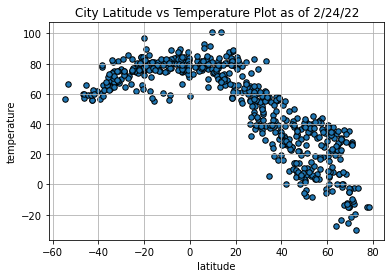

In [8]:

lat_temp = clean_city_data[["latitude","temperature"]]
lat_temp.plot.scatter(x = 'latitude', y = 'temperature', s = 30, edgecolors= "black",grid=True);
plt.title("City Latitude vs Temperature Plot as of 2/24/22")


Conclusion: Temperature significantly falls down as it gets farther away from 0 (equator)

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs Humidity Plot as of 2/24/22')

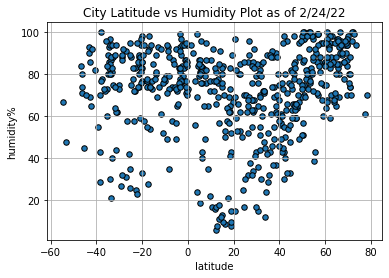

In [9]:
lat_humidity = clean_city_data[["latitude","humidity%"]]
lat_humidity.plot.scatter(x = 'latitude', y = 'humidity%', s = 30, edgecolors= "black",grid=True);
plt.title("City Latitude vs Humidity Plot as of 2/24/22")




Humidity % has least variance closer to the equator and then again farther north from the equator (60-80) both of which have high humidity levels.

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs cloudiness Plot as of 2/24/22')

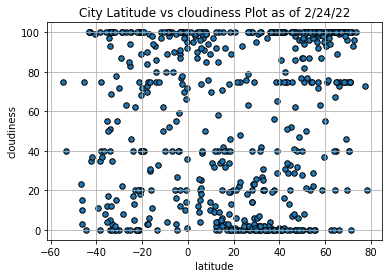

In [10]:
lat_cloudiness = clean_city_data[["latitude","cloudiness"]]
lat_cloudiness.plot.scatter(x = 'latitude', y = 'cloudiness', s = 30, edgecolors= "black",grid=True);
plt.title("City Latitude vs cloudiness Plot as of 2/24/22")



There is not much correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs windspeed Plot as of 2/24/22')

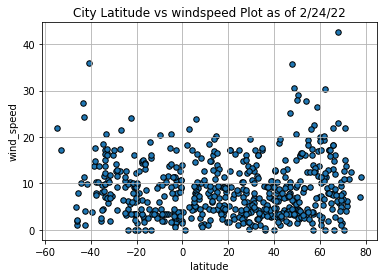

In [12]:
lat_wind = clean_city_data[["latitude","wind_speed"]]
lat_wind.plot.scatter(x = 'latitude', y = 'wind_speed', s = 30, edgecolors= "black",grid=True);
plt.title("City Latitude vs windspeed Plot as of 2/24/22")



Wind speed tends to range between 0 and 15mph regardless of the latitude of the city. The farther the city is from the equator, the higher the chances are of outlier incidents with high speed wind.

## Linear Regression

In [13]:
clean_city_data['latitude'] = clean_city_data['latitude'].astype(int)
North_hem = clean_city_data.loc[clean_city_data['latitude'] >= 0] 
South_hem = clean_city_data.loc[clean_city_data['latitude'] < 0]
South_hem

,id,city,country,latitude,longitude,curr_weather,temperature,min_temperature,max_temperature,pressure,humidity%,visibility,cloudiness,wind_speed
1,1014653,burgersdorp,Burgersdorp,-30,26.3286,Clouds,67.10,67.10,67.10,1014,62,10000,55,7.20
2,4020109,atuona,Atuona,-9,-139.0333,Clouds,78.76,78.76,78.76,1013,79,10000,80,20.47
3,6201424,mataura,Mataura,-46,168.8643,Clear,59.49,59.49,59.49,1023,74,10000,10,1.12
4,3430443,necochea,Necochea,-38,-58.7368,Clouds,78.04,78.04,78.04,1007,43,10000,35,13.69
5,2075265,busselton,Busselton,-33,115.3333,Clouds,67.05,67.05,68.09,1012,80,10000,100,15.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,2173911,broken hill,Broken Hill,-31,141.4333,Clear,74.91,74.91,74.91,1013,64,10000,2,10.36
559,2194098,ahipara,Ahipara,-35,173.1667,Clear,73.13,73.13,73.13,1019,60,10000,4,4.21
561,3695844,lagunas,Lagunas,-5,-75.6753,Clouds,87.53,87.53,87.53,1005,57,10000,55,1.81
570,2136825,isangel,Isangel,-19,169.2667,Clouds,82.51,82.51,82.51,1006,89,10000,40,0.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

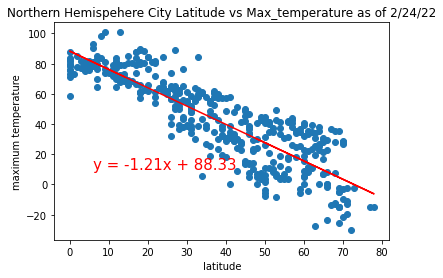

In [14]:


x_values = North_hem['latitude']
y_values = North_hem['max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('maximum temperature')
plt.title('Northern Hemispehere City Latitude vs Max_temperature as of 2/24/22')
plt.show()


Maximum temperature gets lower the farther the city is from equator. The degree of variance increases significantly with the city's distance from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

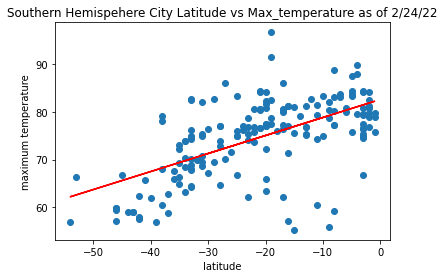

In [15]:

x_values = South_hem['latitude']
y_values = South_hem['max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('maximum temperature')
plt.title('Southern Hemispehere City Latitude vs Max_temperature as of 2/24/22')
plt.show()



On the southern hemisphere, there is not much correlation between latitude and maximum temperature except for the cities close to equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

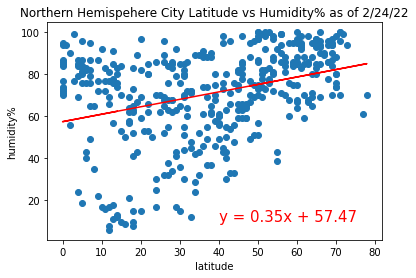

In [16]:

x_values = North_hem['latitude']
y_values = North_hem['humidity%']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity%')
plt.title('Northern Hemispehere City Latitude vs Humidity% as of 2/24/22')
plt.show()

Cities with latitude > 50 have high humidity levels. Even though there is evidence of incidents with similar humidity levels for cities with <50 latitude, there is too much variance to make a conclusion.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

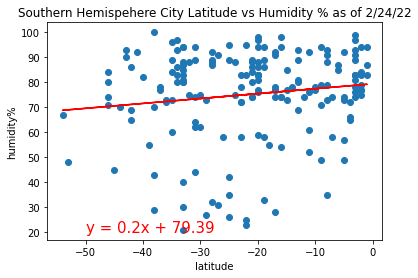

In [17]:

x_values = South_hem['latitude']
y_values = South_hem['humidity%']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity%')
plt.title('Southern Hemispehere City Latitude vs Humidity % as of 2/24/22')
plt.show()


There is too much variance in humidity % for cities in southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

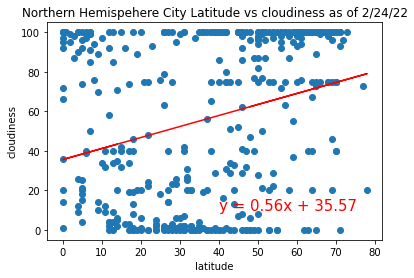

In [18]:
x_values = North_hem['latitude']
y_values = North_hem['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.title('Northern Hemispehere City Latitude vs cloudiness as of 2/24/22')
plt.show()


There is no correlation between latitude and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

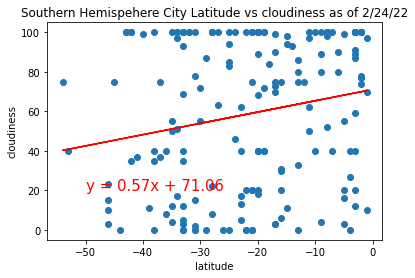

In [19]:
x_values = South_hem['latitude']
y_values = South_hem['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.title('Southern Hemispehere City Latitude vs cloudiness as of 2/24/22')
plt.show()



There is no correlation between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

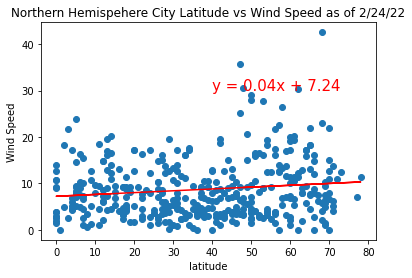

In [20]:
x_values = North_hem['latitude']
y_values = North_hem['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemispehere City Latitude vs Wind Speed as of 2/24/22')
plt.show()


Wind speed tends to range between 0 and 15mph regardless of the latitude of the city. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

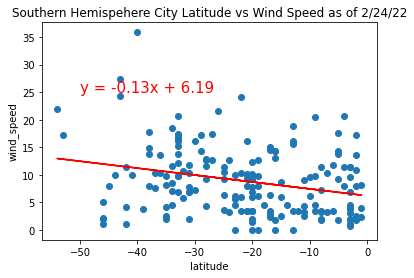

In [21]:
x_values = South_hem['latitude']
y_values = South_hem['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind_speed')
plt.title('Southern Hemispehere City Latitude vs Wind Speed as of 2/24/22')
plt.show()


There is no strong correlation between wind and latitude in southern hemisphere